<a href="https://colab.research.google.com/github/Giuppone/ClassExamples/blob/main/Densities_%26_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

....
# Basic manipulation of tables
```



In [18]:
!pip install ellc --quiet  # comandos con el ! para instalar paquetes en el entorno

In [19]:
# from google.colab import files   #este comando permite subir su archivo
# files.upload()

##prefiero hacerlo asi
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
#Importo librerías
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import *    #importa todas las operaciones matemáticas de math (sin, cos, tan, sqrt, pi, etc)
#plt.style.use('seaborn-white')
#plt.style.use('classic')
plt.figure(figsize=(6.4,4.8))
import pandas as pd

<Figure size 460.8x345.6 with 0 Axes>

In [21]:
# M1 = pandas.read_csv('exoplanet.eu_catalog.csv',delimiter=',')
M1 = pd.read_csv('/content/drive/My Drive/tecnicasdeteccion/exoplanet.eu_catalog.csv')

In [22]:
print(sin(pi/2.),pi)

1.0 3.141592653589793


In [23]:
# cols = M1.columns.tolist()
# cols.columns  
M1.columns

Index(['name', 'planet_status', 'mass', 'mass_error_min', 'mass_error_max',
       'mass_sini', 'mass_sini_error_min', 'mass_sini_error_max', 'radius',
       'radius_error_min', 'radius_error_max', 'orbital_period',
       'orbital_period_error_min', 'orbital_period_error_max',
       'semi_major_axis', 'semi_major_axis_error_min',
       'semi_major_axis_error_max', 'eccentricity', 'eccentricity_error_min',
       'eccentricity_error_max', 'inclination', 'inclination_error_min',
       'inclination_error_max', 'angular_distance', 'discovered', 'updated',
       'omega', 'omega_error_min', 'omega_error_max', 'tperi',
       'tperi_error_min', 'tperi_error_max', 'tconj', 'tconj_error_min',
       'tconj_error_max', 'tzero_tr', 'tzero_tr_error_min',
       'tzero_tr_error_max', 'tzero_tr_sec', 'tzero_tr_sec_error_min',
       'tzero_tr_sec_error_max', 'lambda_angle', 'lambda_angle_error_min',
       'lambda_angle_error_max', 'impact_parameter',
       'impact_parameter_error_min', 'impa

In [24]:
# M1.discovered
M1.star_teff[20:22]

20       NaN
21    2300.0
Name: star_teff, dtype: float64

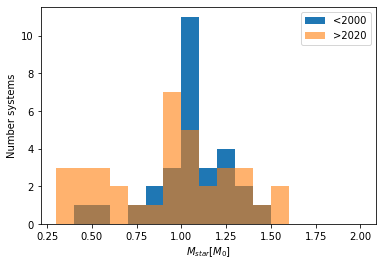

In [25]:
plt.xlabel(r"$M_{star} [M_0]$");
plt.ylabel("Number systems");

#mejora de la información
plt.hist(M1.star_mass[M1.discovered<2000], bins=np.arange(0.3, 2.1, 0.1), label='<2000');
# plt.hist(M1.star_mass[M1.discovered>2020], bins=np.arange(0.3, 2.1, 0.1));
plt.hist(M1.star_mass[M1.discovered>2020], bins=np.arange(0.3, 2.1, 0.1), alpha=0.6, label='>2020');
# #salvar figura
plt.legend()

plt.savefig('histomasas.png',dpi=300,bbox_inches="tight")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


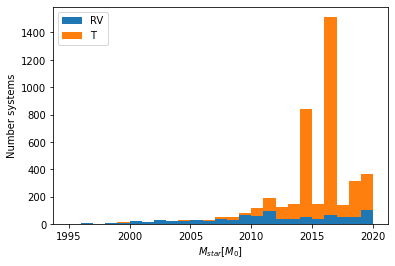

In [66]:
plt.xlabel(r"$M_{star} [M_0]$");
plt.ylabel("Number systems");

#mejora de la información
# plt.hist(M1.discovered, bins=np.arange(1995, 2022, 1));
plt.hist((M1.discovered[M1.detection_type=='Radial Velocity'],M1.discovered[M1.detection_type=='Primary Transit']), bins=np.arange(1995, 2021, 1), stacked=True);
# plt.hist((M1.discovered[M1.detection_type=='Radial Velocity'], stacked=True);
#plt.hist(, , bins=np.arange(0.3, 2.1, 0.1), alpha=0.6, label='>2020');
# #salvar figura
plt.legend(["RV","T"])

plt.savefig('histoanios.png',dpi=300,bbox_inches="tight")

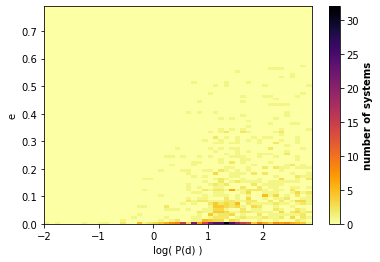

In [67]:
#from colormaps import cmaps  # the colormaps, grouped by category
plt.ylabel(r"e");
plt.xlabel("log( P(d) )");
#plt.hist2d(np.log(M1.orbital_period),M1.eccentricity, bins=(50 , 50), cmap='inferno_r');
plt.hist2d(np.log(M1.orbital_period),M1.eccentricity, bins=(np.arange(-2,3,0.1),(np.arange(0,0.8,0.01))), cmap='inferno_r');
cb = plt.colorbar()
cb.set_label(label='number of systems',weight='bold')

In [31]:
import scipy
from scipy import stats
from scipy.stats import gaussian_kde # importa suavizado gaussiano

In [48]:
M1.head(5)

,name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,radius_error_max,orbital_period,orbital_period_error_min,orbital_period_error_max,semi_major_axis,semi_major_axis_error_min,semi_major_axis_error_max,eccentricity,eccentricity_error_min,eccentricity_error_max,inclination,inclination_error_min,inclination_error_max,angular_distance,discovered,updated,omega,omega_error_min,omega_error_max,tperi,tperi_error_min,tperi_error_max,tconj,tconj_error_min,tconj_error_max,tzero_tr,tzero_tr_error_min,tzero_tr_error_max,tzero_tr_sec,tzero_tr_sec_error_min,...,geometric_albedo,geometric_albedo_error_min,geometric_albedo_error_max,log_g,publication,detection_type,mass_detection_type,radius_detection_type,alternate_names,molecules,star_name,ra,dec,mag_v,mag_i,mag_j,mag_h,mag_k,star_distance,star_distance_error_min,star_distance_error_max,star_metallicity,star_metallicity_error_min,star_metallicity_error_max,star_mass,star_mass_error_min,star_mass_error_max,star_radius,star_radius_error_min,star_radius_error_max,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,11 Com b,Confirmed,NaN,NaN,NaN,19.40,1.50,1.50,NaN,NaN,NaN,326.03,0.32,0.32,1.29,0.05,0.05,0.231,0.005,0.005,NaN,NaN,NaN,0.011664,2008.0,2015-08-21,94.80,1.50,1.50,2452899.60,1.60,1.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Published in a refereed paper,Radial Velocity,NaN,NaN,NaN,NaN,11 Com,185.179167,17.792778,4.74,NaN,NaN,NaN,NaN,110.6,10.5,10.5,-0.35,0.09,0.09,2.7000,0.300,0.300,19.000,2.000,2.000,G8 III,NaN,NaN,NaN,4742.0,100.0,100.0,NaN,NaN,NaN
1,11 Oph b,Confirmed,21.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,730000.00,365000.00,365000.00,243.00,55.00,55.00,NaN,NaN,NaN,NaN,NaN,NaN,1.675862,2007.0,2018-06-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Published in a refereed paper,Imaging,NaN,NaN,Oph 1622-2405 b,NaN,11 Oph,245.604167,-24.087222,NaN,NaN,NaN,NaN,14.03,145.0,20.0,20.0,NaN,NaN,NaN,0.0162,0.005,0.005,NaN,NaN,NaN,M9,0.011,0.002,0.002,2375.0,175.0,175.0,NaN,NaN,"Oph 1622-2405, Oph 11A"
2,11 UMi b,Confirmed,NaN,NaN,NaN,10.50,2.47,2.47,NaN,NaN,NaN,516.22,3.25,3.25,1.54,0.07,0.07,0.080,0.030,0.030,NaN,NaN,NaN,0.012887,2009.0,2009-08-12,117.63,21.06,21.06,2452861.05,2.06,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Published in a refereed paper,Radial Velocity,NaN,NaN,NaN,NaN,11 UMi,229.275000,71.823889,5.02,NaN,NaN,NaN,NaN,119.5,6.9,6.9,0.04,0.04,0.04,1.8000,0.250,0.250,24.080,1.840,1.840,K4III,1.560,0.540,0.540,4340.0,70.0,70.0,NaN,NaN,NaN
3,14 And b,Confirmed,NaN,NaN,NaN,5.33,0.57,0.57,NaN,NaN,NaN,185.84,0.23,0.23,0.83,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.010864,2008.0,2014-08-27,NaN,NaN,NaN,2452861.40,1.50,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Published in a refereed paper,Radial Velocity,NaN,NaN,NaN,NaN,14 And,352.820833,39.236111,5.22,4.1,3.02,2.61,2.33,76.4,4.1,4.1,-0.24,NaN,NaN,2.2000,0.200,0.200,11.000,1.000,1.000,K0III,NaN,NaN,NaN,4813.0,20.0,20.0,NaN,NaN,NaN
4,14 Her b,Confirmed,NaN,NaN,NaN,4.64,0.19,0.19,NaN,NaN,NaN,1773.40,2.50,2.50,2.77,0.05,0.05,0.369,0.005,0.005,NaN,NaN,NaN,0.153039,2002.0,2014-08-27,22.60,0.90,0.90,2451372.70,3.60,3.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Published in a refereed paper,Radial Velocity,NaN,NaN,NaN,NaN,14 Her,242.595833,43.821667,6.67,NaN,NaN,NaN,NaN,18.1,NaN,NaN,0.43,0.08,0.08,0.9000,NaN,NaN,0.708,0.085,0.085,K0 V,5.100,NaN,NaN,5311.0,87.0,87.0,NaN,NaN,NaN


# Data depuration and analysis

In [79]:
# dealing with NANs and infinite values
# df.dropna(inplace=True) #keeps tracks where are missing values
M = M1.dropna(subset=["orbital_period","eccentricity"]) 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

x=np.log10(M.orbital_period)  #defino tal cual era antes para no modificar 
y=M.eccentricity

print (M1.shape,np.shape(x), np.shape(y))


(4432, 98) (1838,) (1838,)


In [80]:
# https://stackoverflow.com/questions/55193696/how-do-i-find-the-values-in-my-numpy-array-that-are-nan-infinity-too-large-for-d

np.isfinite(x).all()
np.isfinite(y).all()
# x[~x.isnull()]
# y[~y.isnull()]

# ar_inf = np.where(np.isinf(y))
# print (ar_inf)

# Mc = M[~(M1.radius.isnull()) & ~np.isnan(M1.radius) 
#      & ~(M1.mass.isnull())   & ~np.isnan(M1.mass) ]

True

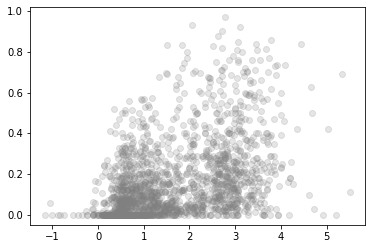

In [85]:
plt.scatter(x,y, c="gray", alpha=0.2)


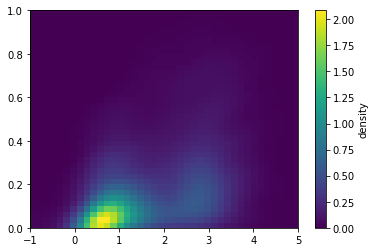

In [88]:
data = np.vstack([x, y])
kde = gaussian_kde(data)

        # evaluate on a regular grid
xgrid = np.linspace(-1, 5, 40)
ygrid = np.linspace(0, 1, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

        # Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
       origin='lower', aspect='auto',
       extent=[-1, 5, 0, 1],
       cmap='viridis')
# plt.scatter(x,y, c="gray", alpha=0.2)
cb = plt.colorbar()
cb.set_label("density")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


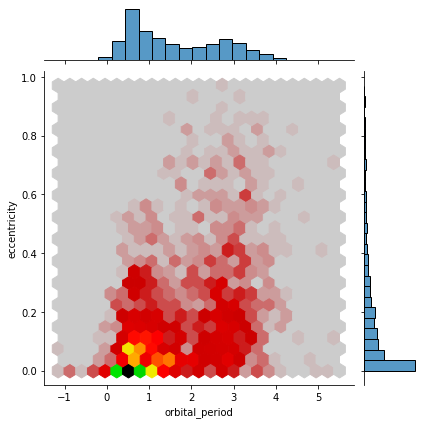

In [94]:
import seaborn as sns

sns.jointplot(np.log10(M.orbital_period),M.eccentricity, kind="hex", cmap='nipy_spectral_r')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


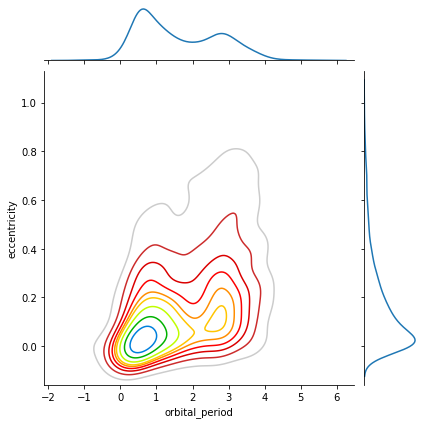

In [97]:
sns.jointplot(np.log10(M.orbital_period),M.eccentricity, kind="kde", cmap='nipy_spectral_r')
plt.show()

In [100]:
M = M1.dropna(subset=["orbital_period","mass"]) 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

x=np.log10(M.orbital_period)  #defino tal cual era antes para no modificar 
y=np.log10(M.mass)

print (M1.shape,np.shape(x), np.shape(y))

(4432, 98) (1154,) (1154,)


Text(0, 0.5, 'Ĺog(M [M$_J$])')

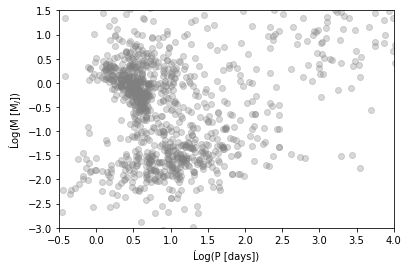

In [105]:
plt.scatter(x,y, c="gray", alpha=0.3)
plt.xlim(-0.5,4)
plt.ylim(-3,1.5)
plt.xlabel(r'Ĺog(P [days])')
plt.ylabel(r'Ĺog(M [M$_J$])')
#see and compare with the diap 27 in class.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


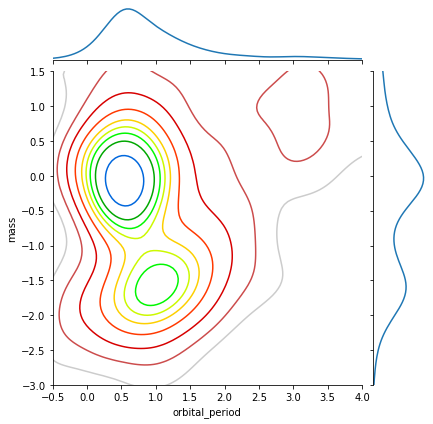

In [109]:
plot = sns.jointplot(np.log10(M.orbital_period),np.log10(M.mass), kind="kde", cmap='nipy_spectral_r')
plot.ax_marg_x.set_xlim(-0.5,4)
plot.ax_marg_y.set_ylim(-3,1.5)
plt.show()

# Lets evaluate the correlations in the table

In [183]:
# 'mass_detection_type', 'radius_detection_type'
M1.columns   #98 columns 5000 entries
df = M1[['mass', 'mass_sini','radius', 'orbital_period', 
       'semi_major_axis', 'eccentricity', 'inclination', 'angular_distance', 'discovered',
       'omega', 'impact_parameter', 'k', 'temp_calculated', 'temp_measured', 'log_g', 'star_distance',
       'star_metallicity', 'star_mass', 'star_radius', 'star_age', 'star_teff',
       'star_magnetic_field']]
# M1.shape
# df.corr()  #correlaciones entre todas las columnas

corr = round(df.corr(),2)
# corr

In [182]:
corr.style.background_gradient()

,mass,mass_sini,radius,orbital_period,semi_major_axis,eccentricity,inclination,angular_distance,discovered,omega,impact_parameter,k,temp_calculated,temp_measured,log_g,star_distance,star_metallicity,star_mass,star_radius,star_age,star_teff
mass,1.000000,0.710000,0.150000,0.090000,0.130000,0.290000,-0.260000,0.050000,-0.110000,-0.020000,0.030000,-0.000000,0.200000,-0.130000,0.890000,0.030000,0.010000,-0.000000,0.220000,-0.070000,0.070000
mass_sini,0.710000,1.000000,0.120000,0.180000,0.020000,0.240000,-0.070000,0.050000,0.050000,-0.010000,0.140000,0.550000,0.160000,nan,nan,0.150000,-0.070000,0.240000,0.240000,-0.160000,0.090000
radius,0.150000,0.120000,1.000000,0.070000,0.070000,-0.070000,-0.130000,0.080000,-0.170000,0.150000,0.120000,0.070000,0.500000,0.810000,0.050000,-0.070000,0.220000,0.360000,0.350000,-0.040000,0.180000
orbital_period,0.090000,0.180000,0.070000,1.000000,0.600000,0.070000,-0.110000,0.520000,-0.060000,-0.000000,-0.000000,0.000000,-0.040000,-0.170000,0.470000,-0.040000,-0.030000,0.000000,0.010000,-0.060000,-0.010000
semi_major_axis,0.130000,0.020000,0.070000,0.600000,1.000000,0.070000,-0.140000,0.550000,-0.030000,0.010000,0.020000,0.000000,-0.140000,0.060000,0.340000,-0.050000,-0.020000,0.060000,0.060000,-0.090000,0.020000
eccentricity,0.290000,0.240000,-0.070000,0.070000,0.070000,1.000000,-0.090000,-0.010000,-0.090000,0.060000,-0.020000,0.040000,-0.200000,-0.210000,0.620000,-0.130000,0.060000,0.060000,0.070000,0.040000,0.010000
inclination,-0.260000,-0.070000,-0.130000,-0.110000,-0.140000,-0.090000,1.000000,-0.220000,0.320000,-0.040000,-0.440000,0.200000,-0.300000,0.170000,-0.460000,0.040000,-0.020000,-0.020000,0.090000,0.010000,-0.060000
angular_distance,0.050000,0.050000,0.080000,0.520000,0.550000,-0.010000,-0.220000,1.000000,-0.000000,-0.020000,0.340000,-0.060000,-0.450000,-0.570000,1.000000,-0.030000,-0.070000,0.060000,-0.020000,-0.080000,0.050000
discovered,-0.110000,0.050000,-0.170000,-0.060000,-0.030000,-0.090000,0.320000,-0.000000,1.000000,-0.110000,0.110000,0.060000,-0.130000,0.080000,-0.500000,0.090000,-0.090000,-0.160000,-0.070000,-0.050000,-0.080000
omega,-0.020000,-0.010000,0.150000,-0.000000,0.010000,0.060000,-0.040000,-0.020000,-0.110000,1.000000,0.000000,-0.010000,0.000000,-0.630000,-0.110000,-0.070000,0.070000,0.020000,0.030000,0.040000,0.020000


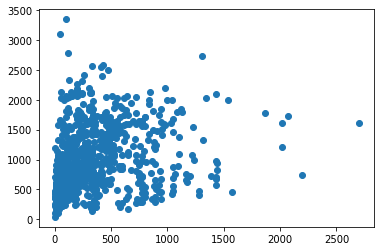

In [185]:
plt.scatter(df.star_distance,df.temp_calculated)

# ML clustering in P-mass relation. Using two relations 
We will identify hot jupiter - warm saturn - rocky planets

In [123]:
M.orbital_period.shape
M.mass.shape


(1154,)

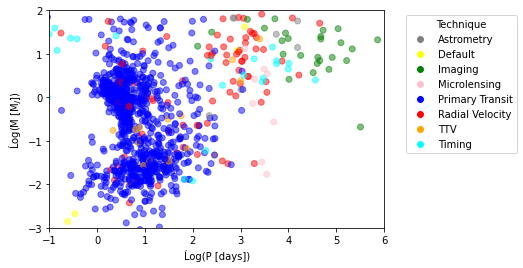

In [149]:
np.unique(M.detection_type)
# https://kanoki.org/2020/08/30/matplotlib-scatter-plot-color-by-category-in-python/
# plt.scatter(np.log10(M.orbital_period),np.log10(M.mass), c=M.detection_type)

# #we must to construct a dictionary and then mapping
colors = {'Astrometry':'gray', 'Default':'brown', 'Imaging':'green', 'Microlensing':'pink',
          'Primary Transit':'blue',
          'Radial Velocity':'red', 'TTV':'orange','Timing':'cyan', 'Default':'yellow'}

plt.xlabel(r'Ĺog(P [days])')
plt.ylabel(r'Ĺog(M [M$_J$])')
plt.ylim(-3,2)
plt.xlim(-1,6)
ax = plt.scatter(np.log10(M.orbital_period),np.log10(M.mass), c=M.detection_type.map(colors), alpha=0.5)

# add a legend
from matplotlib.lines import Line2D  # for legend handle
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
plt.legend(title='Technique', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')


In [150]:
# # see this two usefull commands
# # M.detection_type.map(colors)
# for i in colors:
#   print(colors[i] )
# key_list = list(colors.keys())
# val_list = list(colors.values())  
# print (key_list)

In [161]:
# %%time 
from sklearn import preprocessing
from sklearn.cluster import KMeans

newdf=M[["orbital_period","mass"]].dropna() #le dice q columnas eliminar si tienen NAN
newdf.orbital_period =np.log10(newdf.orbital_period)
newdf.mass           =np.log10(newdf.mass)

# newdf = [[np.log10(M.orbital_period),np.log10(M.mass)]] 
kmeans = KMeans(n_clusters=4, random_state=0).fit(newdf)
# print(newdf)
kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

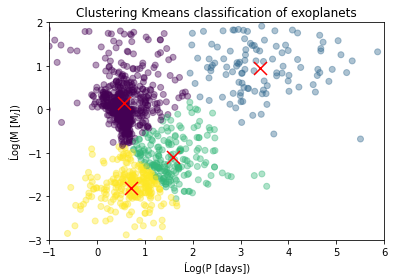

In [186]:
plt.scatter(newdf["orbital_period"],newdf["mass"], c= kmeans.labels_, cmap="viridis", alpha=0.4)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0],centroids[:, 1],marker="x", s=169,linewidths=3,color="red",zorder=10)

plt.ylim(-3,2)
plt.xlim(-1,6)
# plt.scatter(kmeans.cluster_centers_[0],kmeans.cluster_centers_[1], c='red', marker= '+', s=22)
plt.title(r'Clustering Kmeans classification of exoplanets')

plt.xlabel(r'Ĺog(P [days])')
plt.ylabel(r'Ĺog(M [M$_J$])')

plt.show()


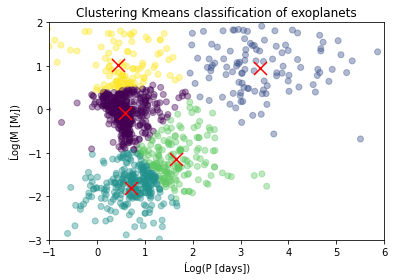

In [187]:
# newdf = [[np.log10(M.orbital_period),np.log10(M.mass)]] 
kmeans = KMeans(n_clusters=5, random_state=0).fit(newdf)
# print(newdf)
kmeans.labels_

plt.scatter(newdf["orbital_period"],newdf["mass"], c= kmeans.labels_, cmap="viridis", alpha=0.4)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0],centroids[:, 1],marker="x", s=169,linewidths=3,color="red",zorder=10)

plt.ylim(-3,2)
plt.xlim(-1,6)
# plt.scatter(kmeans.cluster_centers_[0],kmeans.cluster_centers_[1], c='red', marker= '+', s=22)
plt.title(r'Clustering Kmeans classification of exoplanets')

plt.xlabel(r'Ĺog(P [days])')
plt.ylabel(r'Ĺog(M [M$_J$])')

plt.show()

# Now Kmeans using more dimensions (period, mass, radius)

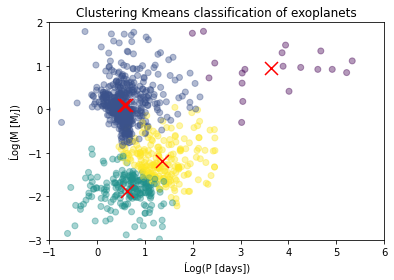

In [189]:
newdf=M[["orbital_period","mass","radius","star_mass"]].dropna() #le dice q columnas eliminar si tienen NAN
newdf.orbital_period =np.log10(newdf.orbital_period)
newdf.mass           =np.log10(newdf.mass)

# newdf = [[np.log10(M.orbital_period),np.log10(M.mass)]] 
kmeans = KMeans(n_clusters=5, random_state=0).fit(newdf)
# print(newdf)
kmeans.labels_

plt.scatter(newdf["orbital_period"],newdf["mass"], c= kmeans.labels_, cmap="viridis", alpha=0.4)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0],centroids[:, 1],marker="x", s=169,linewidths=3,color="red",zorder=10)

plt.ylim(-3,2)
plt.xlim(-1,6)
# plt.scatter(kmeans.cluster_centers_[0],kmeans.cluster_centers_[1], c='red', marker= '+', s=22)
plt.title(r'Clustering Kmeans classification of exoplanets')

plt.xlabel(r'Ĺog(P [days])')
plt.ylabel(r'Ĺog(M [M$_J$])')

plt.show()